In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast
import re
import ast
import numpy as np
from matplotlib.patches import Patch

ANALYSIS_FOLDER = 'Experiments_Folder/VizRec/Analysis/'

In [69]:
def get_user_name(url):

    if len(url) >15 or url.endswith('.csv'):
        parts = url.split('/')
        fname = parts[-1]
        uname = fname.rstrip('_log.csv')
        return uname
    return url

In [70]:
def rename_algorithms(df):
           #trim everything before first - for the algorithm name
        df['Algorithm'] = df['Algorithm'].apply(lambda x: x.split('-')[0])
        #rename algorithm name if AC then change to Actor-Critic if Online change to Online SVM if FullOffline change to  Offline SVM
        df['Algorithm'] = df['Algorithm'].apply(lambda x: 'Actor-Critic' if x == 'AC' else x)
        df['Algorithm'] = df['Algorithm'].apply(lambda x: 'Online SVM' if x == 'Online' else x)
        df['Algorithm'] = df['Algorithm'].apply(lambda x: 'Offline SVM' if x == 'FullOfflineSVM' else x)
        return df


In [71]:
datasets = ['movies', 'birdstrikes']
tasks = ['p1', 'p2', 'p3', 'p4']
algorithms = ['Online-SVM-Single-Model', 'WSLS-Single-Model',  'Momentum-Single-Model', 'Bayesian-Single-Model', 'HMM-Single-Model', 'Random-Single-Model', 'Greedy-Single-Model','QLearn-Single-Model', 'AC-Single-Model', 'Reinforce-Single-Model','SARSA-Single-Model', 'QLearn-Aligned-Test-Single-Model']

combined_results = pd.DataFrame()
for dataset in datasets:
    for task in tasks:
        for algorithm in algorithms:
            #combine into the same dataframe
            print(f'Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv')
            file_name = f"Experiments_Folder/VizRec/{dataset}/{task}/{algorithm}.csv"

            results = pd.read_csv(file_name)
            results['Dataset'] = dataset
            results['Task'] = task
            results['Algorithm'] = algorithm
            if algorithm =="QLearn-Aligned-Test-Single-Model":
                results['Algorithm'] = "QLearnAligned"
            combined_results = pd.concat([combined_results, results])

Experiments_Folder/VizRec/movies/p1/Online-SVM-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/WSLS-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Momentum-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Bayesian-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/HMM-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Random-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Greedy-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/QLearn-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/AC-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/Reinforce-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/SARSA-Single-Model.csv
Experiments_Folder/VizRec/movies/p1/QLearn-Aligned-Test-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/Online-SVM-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/WSLS-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/Momentum-Single-Model.csv
Experiments_Folder/VizRec/movies/p2/Bayesian-Single-Model.csv
Experiments_Folder/V

In [72]:
combined_results = rename_algorithms(combined_results)

In [73]:
combined_results['User'] = combined_results['User'].apply(lambda x: get_user_name(x))

In [74]:
combined_results['User'].unique()

array(['stu7_ade_p1', 'pro5_adf_p1', 'stu30_adf_p1', 'stu38_acf_p1',
       'stu10_acf_p1', 'stu39_adf_p1', 'stu21_ace_p1', 'pro3_ace_p1',
       'pro24_adf_p1', 'stu11_adf_p1', 'pro25_acf_p1', 'stu6_acf_p1',
       'pro13_ace_p1', 'pro20_ade_p1', 'stu37_adf_p1', 'pro9_acf_p1',
       'stu15_ade_p1', 'pro21_ade_p1', 'pro31_adf_p1', 'pro15_ade_p1',
       'stu26_ace_p1', 'pro17_ace_p1', 'stu4_ade_p1', 'pro18_adf_p1',
       'stu3_acf_p1', 'stu25_ace_p1', 'stu31_ade_p1', 'pro29_ace_p1',
       'stu24_ace_p1', 'stu13_acf_p1', 'stu29_ade_p1', 'pro22_ade_p1',
       'stu17_ace_p1', 'pro23_acf_p1', 'pro8_acf_p1', 'stu36_adf_p1',
       'stu7_ade_p2', 'pro5_adf_p2', 'stu30_adf_p2', 'stu38_acf_p2',
       'stu10_acf_p2', 'stu39_adf_p2', 'stu21_ace_p2', 'pro3_ace_p2',
       'pro24_adf_p2', 'stu11_adf_p2', 'pro25_acf_p2', 'stu6_acf_p2',
       'pro13_ace_p2', 'pro20_ade_p2', 'stu37_adf_p2', 'pro9_acf_p2',
       'stu15_ade_p2', 'pro21_ade_p2', 'pro31_adf_p2', 'pro15_ade_p2',
       'stu26_ace_p

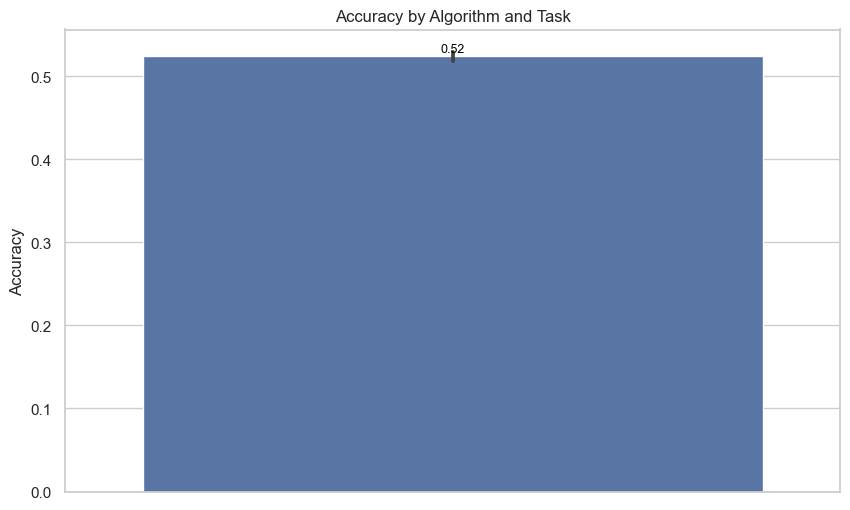

In [75]:

import seaborn as sns

def add_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=combined_results , y='Accuracy', hue='Algorithm')
plt.title('Accuracy by Algorithm and Task')
add_values_on_bars(ax)
plt.show()
# #show overlap of candle stick plot
# plt.figure(figsize=(10, 6))
# ax = sns.violinplot(data=combined_results, y='Accuracy', hue='Algorithm', split=True)
# plt.title('Accuracy by Algorithm and Task')
# plt.show()







     Algorithm 1    Algorithm 2  t-statistic        p-value
0     Online SVM           WSLS    48.987012  3.459139e-207
1     Online SVM       Momentum     4.801355   2.013105e-06
2     Online SVM       Bayesian     7.841295   2.182714e-14
3     Online SVM            HMM    11.834113   4.583969e-29
4     Online SVM         Random    47.590188  2.128340e-201
..           ...            ...          ...            ...
61  Actor-Critic          SARSA    -1.737584   8.282054e-02
62  Actor-Critic  QLearnAligned   -10.484519   1.190292e-23
63     Reinforce          SARSA    -2.565528   1.055472e-02
64     Reinforce  QLearnAligned   -10.667084   2.332049e-24
65         SARSA  QLearnAligned   -10.118269   2.959622e-22

[66 rows x 4 columns]


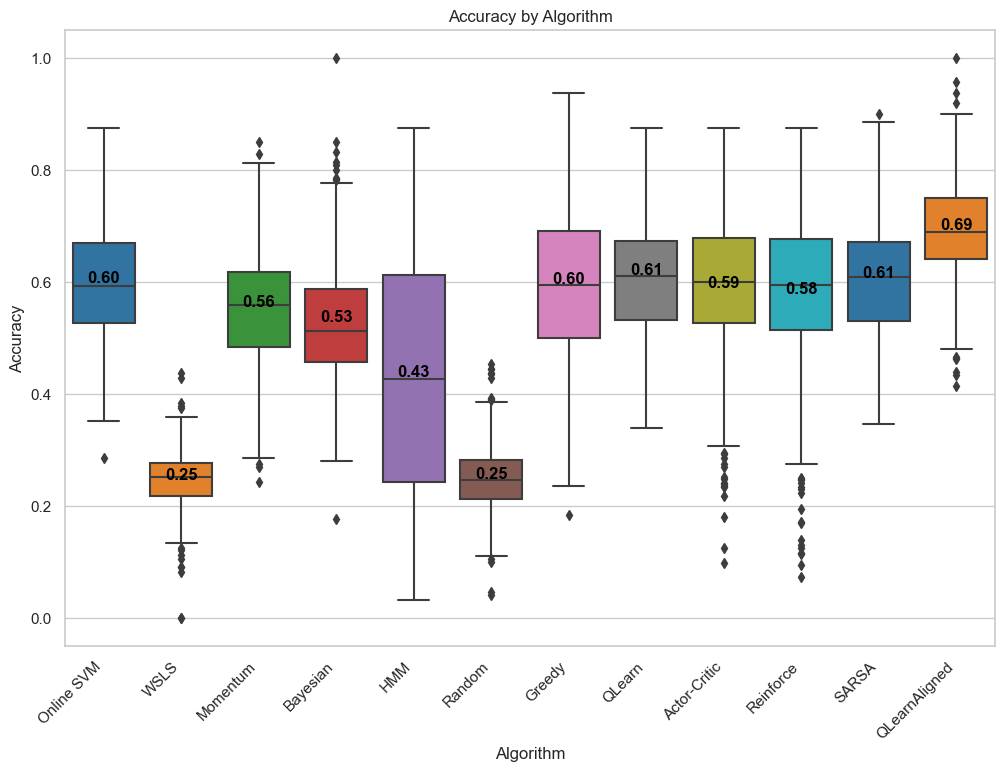

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import itertools

def plot_accuracy_with_ttest(combined_results, analysis_folder):
    # Perform pairwise t-tests between different algorithms
    algorithms = combined_results['Algorithm'].unique()
    pairs = list(itertools.combinations(algorithms, 2))  # Create pairs of algorithms for comparison

    # Store t-test results in a DataFrame
    ttest_results = []

    for pair in pairs:
        group1 = combined_results[combined_results['Algorithm'] == pair[0]]['Accuracy']
        group2 = combined_results[combined_results['Algorithm'] == pair[1]]['Accuracy']

        # Perform independent t-test
        t_stat, p_value = stats.ttest_ind(group1, group2)
        ttest_results.append({
            'Algorithm 1': pair[0],
            'Algorithm 2': pair[1],
            't-statistic': t_stat,
            'p-value': p_value
        })

    # Convert results to a DataFrame for easier visualization
    ttest_results_df = pd.DataFrame(ttest_results)
    print(ttest_results_df)  # Show the t-test results

    # Optionally, save the t-test results to a CSV file
    ttest_results_path = f'{analysis_folder}ttest_results.csv'
    ttest_results_df.to_csv(ttest_results_path, index=False)

    # Create a boxplot for visual comparison
    plt.figure(figsize=(12, 8))
    ax = sns.boxplot(data=combined_results, x='Algorithm', y='Accuracy', palette="tab10")

    # Title and labels
    plt.title('Accuracy by Algorithm')
    plt.xticks(rotation=45, ha='right')

    # Add mean accuracy as text annotation on each boxplot
    means = combined_results.groupby('Algorithm')['Accuracy'].mean()
    x_ticks = ax.get_xticks()  # Get the x positions of the boxes on the plot
    for i, algorithm in enumerate(ax.get_xticklabels()):
        algorithm_name = algorithm.get_text()  # Get the algorithm name from the x-axis label
        mean_val = means[algorithm_name]
        ax.text(x_ticks[i], mean_val, f'{mean_val:.2f}',
                horizontalalignment='center', color='black', weight='semibold')

    # # Plot individual points to identify outliers with usernames
    # for i, algorithm in enumerate(algorithms):
    #     # Filter data for the current algorithm
    #     algorithm_data = combined_results[combined_results['Algorithm'] == algorithm]
    #     # Calculate IQR for detecting outliers
    #     q1 = algorithm_data['Accuracy'].quantile(0.25)
    #     q3 = algorithm_data['Accuracy'].quantile(0.75)
    #     iqr = q3 - q1
    #     lower_bound = q1 - 1.5 * iqr
    #     upper_bound = q3 + 1.5 * iqr
    #     # Filter outliers
    #     outliers = algorithm_data[(algorithm_data['Accuracy'] < lower_bound) |
    #                               (algorithm_data['Accuracy'] > upper_bound)]
    #
    #     # Plot outliers with their usernames
    #     for _, row in outliers.iterrows():
    #         ax.text(i, row['Accuracy'], row['User'],  # Label the point with username
    #                 horizontalalignment='center', color='red', weight='semibold')

    # Save the plot
    save_path = f'{analysis_folder}Accuracy_by_Algorithm_Boxplot.png'
    plt.savefig(save_path)

    # Show the plot
    plt.show()

# Example usage:
plot_accuracy_with_ttest(combined_results, ANALYSIS_FOLDER)


In [77]:
#save the combined results to a csv
combined_results.to_csv(f'{ANALYSIS_FOLDER}GOLD-combined_results.csv', index=False)

In [78]:
combined_results.shape

(3456, 11)

In [79]:
#get length of predictions for each algorithm
selected_algorithms = combined_results["Algorithm"].unique()
for algorithm in selected_algorithms:
    #predictionn set for each algorithm
    pred_set = combined_results[combined_results["Algorithm"] == algorithm]
    #get the length of predictions
    #cobine all predictions into a single list
    all_predictions = []
    all_truth = []
    for index, row in pred_set.iterrows():
        all_predictions.extend(ast.literal_eval(row['Predictions']))
        all_truth.extend(ast.literal_eval(row['GroundTruth']))
    print(f'Length of predictions for {algorithm}: {len(all_predictions)}')
    print(f'Length of truth for {algorithm}: {len(all_truth)}')

Length of predictions for Online SVM: 30775
Length of truth for Online SVM: 30775
Length of predictions for WSLS: 30775
Length of truth for WSLS: 30775
Length of predictions for Momentum: 30775
Length of truth for Momentum: 30775
Length of predictions for Bayesian: 30775
Length of truth for Bayesian: 30775
Length of predictions for HMM: 30775
Length of truth for HMM: 30775
Length of predictions for Random: 30775
Length of truth for Random: 30775
Length of predictions for Greedy: 30775
Length of truth for Greedy: 30775
Length of predictions for QLearn: 30775
Length of truth for QLearn: 30775
Length of predictions for Actor-Critic: 30775
Length of truth for Actor-Critic: 30775
Length of predictions for Reinforce: 30775
Length of truth for Reinforce: 30775
Length of predictions for SARSA: 30775
Length of truth for SARSA: 30775
Length of predictions for QLearnAligned: 30775
Length of truth for QLearnAligned: 30775


In [80]:

# Function to map predictions and ground truth to encoded values
def encode_predictions(user_data, prediction_map):
    """
    Encode the predictions and ground truth based on a mapping and return a dictionary
    of algorithms with their corresponding encoded predictions.

    Parameters:
    - user_data: DataFrame containing user-specific results (including predictions).
    - prediction_map: Dictionary mapping prediction categories to integers.

    Returns:
    - algorithm_pred: Dictionary with algorithms as keys and encoded prediction lists as values.
    """
    algorithm_pred = {}

    # Iterate through each row in the user's data
    for index, row in user_data.iterrows():
        encode_pred = [prediction_map[pred] for pred in ast.literal_eval(row['Predictions'])]
        algorithm_pred[row['Algorithm']] = encode_pred

        # Encode the ground truth values for each row
        encode_truth = [prediction_map[truth] for truth in ast.literal_eval(row['GroundTruth'])]
        algorithm_pred["Truth"] = encode_truth  # Ground truth stored as 'Truth'

    return algorithm_pred

# Function to normalize the length of all prediction lists
def normalize_prediction_lengths(algorithm_pred):
    """
    Ensure all prediction lists in the dictionary have the same length by padding
    shorter lists with 0.

    Parameters:
    - algorithm_pred: Dictionary with algorithms and their corresponding encoded predictions.

    Returns:
    - algorithm_pred: Dictionary with predictions lists of the same length.
    """
    # Get the maximum length of predictions across all algorithms
    max_len = max(len(pred) for pred in algorithm_pred.values())

    for algorithm, pred in algorithm_pred.items():
        print(algorithm, len(pred))

    # Pad shorter lists with zeros to match the maximum length
    for algorithm, pred in algorithm_pred.items():
        notMatchingAlgorithms = []
        if len(pred) < max_len:
            notMatchingAlgorithms.append(algorithm)

            algorithm_pred[algorithm] = pred + [0] * (max_len - len(pred))
    print(notMatchingAlgorithms)
    return algorithm_pred

# Function to plot the heatmap with categorical color index
def plot_encoded_predictions_heatmap(pred_df, user, categories, category_colors):
    """
    Plot a heatmap of encoded predictions with a categorical color index.

    Parameters:
    - pred_df: DataFrame containing the encoded predictions for each algorithm.
    - user: User identifier for the title of the plot.
    - categories: Unique categories used for encoding predictions.
    - category_colors: List of colors corresponding to the categories.
    """
    sns.set(style='whitegrid')
    plt.figure(figsize=(12, 6))

    # Create a heatmap with space between algorithms
    ax = sns.heatmap(pred_df.T, cmap=category_colors, cbar=False, annot=False, fmt='d',
                     linewidths=2, linecolor='white')

    # Add title and labels
    plt.title(f'Encoded Predictions for User {user}')
   #remove x labels and ticks
    ax.set_xticks([])
    plt.ylabel('Algorithm')

    # Create patches for the categorical color legend
    legend_patches = [Patch(color=category_colors[i], label=f'modify-{categories[i]}')
                      for i in range(len(categories))]

    # Add a legend to the right of the plot
    plt.legend(handles=legend_patches, title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Display the plot
    plt.tight_layout()
    plt.show()

# Driver function to process and visualize user prediction data
def driver_function(combined_results, user, prediction_map):
    """
    Orchestrates the encoding, normalization, and plotting of predictions for a given user.

    Parameters:
    - combined_results: DataFrame containing all user results.
    - user: Specific user identifier to filter the data.
    - prediction_map: Dictionary mapping prediction categories to integers.
    """
    # Filter user-specific data and compute accuracy differences
    user_data = combined_results[combined_results['User'] == user]
    user_data['Difference'] = user_data['Accuracy'].diff()
    user_data = user_data.sort_values(by='Difference', ascending=False)

    #print(user_data[['Algorithm', 'Accuracy', 'Task', 'Dataset', 'Predictions']])

    # Step 1: Encode predictions and ground truth
    algorithm_pred = encode_predictions(user_data, prediction_map)

    # Step 2: Normalize prediction lengths
    algorithm_pred = normalize_prediction_lengths(algorithm_pred)

    # Step 3: Create a DataFrame for the encoded predictions
    pred_df = pd.DataFrame(algorithm_pred)

    # Step 4: Reorder the DataFrame to keep 'Truth' at the top
    pred_df = pred_df.set_index(pd.CategoricalIndex(pred_df.index, categories=['Truth'] +
                                                    [alg for alg in pred_df.index if alg != 'Truth'],
                                                    ordered=True))
    #reset index


    # Step 5: Generate distinct colors for the categories
    categories = np.unique(pred_df.values)
    category_colors = sns.color_palette("tab10", len(categories))

    # Step 6: Plot the encoded predictions heatmap
    plot_encoded_predictions_heatmap(pred_df, user, categories, category_colors)




In [81]:
# Step 1: Find the best-performing users for the "QLearn" algorithm when the task is "p4"
best_user_qlearn = combined_results[(combined_results['Algorithm'] == 'QLearn') & (combined_results['Task'] == 'p2')].sort_values(by='Accuracy', ascending=False).iloc[:3]
print("Best Performing Users for QLearn (Task = p4):")
print(best_user_qlearn[['User', 'Algorithm', 'Accuracy']])

# Step 2: Find the worst-performing users for all other algorithms, when the task is "p4"
worst_users_other_algorithms = combined_results[(combined_results['Algorithm'] != 'QLearn') & (combined_results['Task'] == 'p4')].groupby('Algorithm').apply(lambda x: x.sort_values(by='Accuracy').iloc[0])

print("\nWorst Performing Users for Other Algorithms (Task = p2):")
print(worst_users_other_algorithms[['User', 'Algorithm', 'Accuracy']])

Best Performing Users for QLearn (Task = p4):
            User Algorithm  Accuracy
4   pro18_adf_p2    QLearn  0.857143
34   stu8_bce_p2    QLearn  0.837838
27  stu32_bce_p2    QLearn  0.837838

Worst Performing Users for Other Algorithms (Task = p2):
                       User      Algorithm  Accuracy
Algorithm                                           
Actor-Critic   stu19_bde_p4   Actor-Critic  0.270440
Bayesian       pro31_adf_p4       Bayesian  0.320261
Greedy         pro31_adf_p4         Greedy  0.281046
HMM            stu16_bcf_p4            HMM  0.086614
Momentum       stu37_adf_p4       Momentum  0.345865
Online SVM     stu37_adf_p4     Online SVM  0.360902
QLearnAligned  pro27_bcf_p4  QLearnAligned  0.463415
Random         stu20_bdf_p4         Random  0.125000
Reinforce      stu15_ade_p4      Reinforce  0.251046
SARSA          stu37_adf_p4          SARSA  0.368421
WSLS            stu5_bcf_p4           WSLS  0.112676


In [82]:
user = 'stu19_bde_p4'
resulting=combined_results[combined_results['User'] == user]


Momentum 159
Truth 159
Reinforce 159
QLearnAligned 159
Greedy 159
Random 159
SARSA 159
QLearn 159
Bayesian 159
Actor-Critic 159
HMM 159
WSLS 159
Online SVM 159
[]


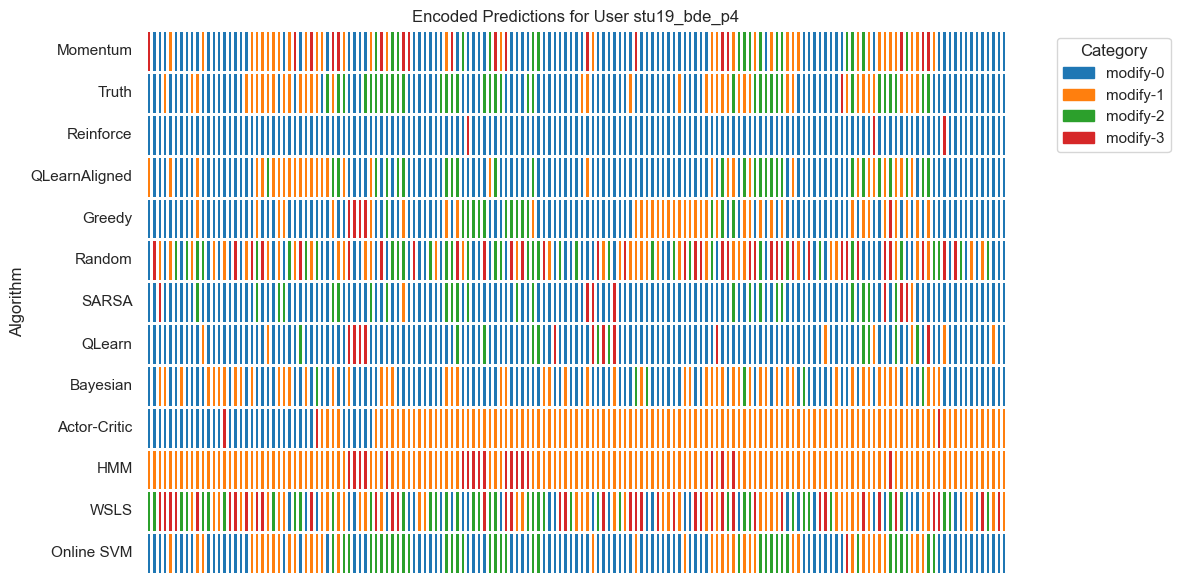

In [83]:
prediction_map = {'same': 0, 'modify-1': 1, 'modify-2': 2, 'modify-3': 3}
# Call the driver function with the necessary parameters
driver_function(resulting, user, prediction_map)

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

# Function to encode predictions and ground truth
def encode_predictions(user_data, prediction_map):
    """
    Encode the predictions and ground truth based on a mapping and return a dictionary
    of algorithms with their corresponding encoded predictions.

    Parameters:
    - user_data: DataFrame containing user-specific results (including predictions).
    - prediction_map: Dictionary mapping prediction categories to integers.

    Returns:
    - algorithm_pred: Dictionary with algorithms as keys and encoded prediction lists as values.
    """
    algorithm_pred = {}

    # Iterate through each row in the user's data
    for index, row in user_data.iterrows():
        encode_pred = [prediction_map[pred] for pred in ast.literal_eval(row['Predictions'])]
        if row['Algorithm'] not in algorithm_pred:
            algorithm_pred[row['Algorithm']] = []
            algorithm_pred['Truth'] = []
        algorithm_pred[row['Algorithm']].extend(encode_pred)

        #Encode truth values for only 1 algorithm
        if row['Algorithm'] == 'QLearn':
            encode_truth = [prediction_map[truth] for truth in ast.literal_eval(row['GroundTruth'])]
            algorithm_pred["Truth"].extend(encode_truth)  # Ground truth stored as 'Truth'


    return algorithm_pred

# Function to compute transitions between consecutive actions
def compute_transitions(algorithm_preds, algorithm_name):
    """
    Compute the transitions between consecutive actions and count their frequency.

    Parameters:
    - algorithm_preds: A list of encoded predictions for an algorithm.
    - algorithm_name: The name of the algorithm to add to the DataFrame.

    Returns:
    - transitions_df: A DataFrame containing transition frequencies with columns ['From', 'To', 'Count', 'Algorithm'].
    """
    transitions = []
    for i in range(len(algorithm_preds) - 1):
        transitions.append((algorithm_preds[i], algorithm_preds[i + 1]))  # Capture consecutive transitions

    # Count the frequency of each transition
    transition_counts = pd.DataFrame(transitions, columns=['From', 'To']).value_counts().reset_index(name='Count')
    transition_counts['Algorithm'] = algorithm_name  # Add a column for the algorithm name

    return transition_counts

# Function to plot bubble plots for each algorithm in side-by-side subplots
def plot_transitions_bubble_side_by_side(algorithm_transitions_dict):
    """
    Create side-by-side bubble plots to visualize the transition frequencies for each algorithm.

    Parameters:
    - algorithm_transitions_dict: Dictionary with algorithm names as keys and their corresponding transition DataFrames as values.
    """
    # Number of algorithms
    num_algorithms = len(algorithm_transitions_dict)

    # Create subplots for each algorithm
    fig, axes = plt.subplots(1, num_algorithms, figsize=(18, 6), sharey=True)

    # Adjust spacing between subplots
    plt.subplots_adjust(wspace=0.3)

    # Iterate over algorithms and their transition data
    for i, (algorithm, transitions_df) in enumerate(algorithm_transitions_dict.items()):
        ax = axes[i]
        sns.scatterplot(data=transitions_df, x='From', y='To', size='Count', hue='Count',
                        sizes=(100, 1000), ax=ax, alpha=0.6, palette='coolwarm', edgecolor='black', legend=False)

        # Add title and labels
        ax.set_title(f'Transitions for {algorithm}')
        ax.set_xlabel('From Action')
        ax.set_ylabel('To Action')

        # Annotate bubble sizes (PERCENTAGE) in the plot
        # for j in range(len(transitions_df)):
        #     ax.text(transitions_df['From'][j], transitions_df['To'][j], transitions_df['Count'][j],
        #             color='black', ha='center', va='center', fontsize=10)
        #percentage should add up to 100
        total = transitions_df['Count'].sum()
        for j in range(len(transitions_df)):
            ax.text(transitions_df['From'][j], transitions_df['To'][j], f'{transitions_df["Count"][j]/total:.2f}',
                    color='black', ha='center', va='center', fontsize=10)
    # Show the combined plot
    plt.tight_layout()
    plt.show()

# Driver function to compute transitions and plot them for multiple algorithms in side-by-side plots
def driver_bubble_plot_side_by_side(algorithm_preds_dict):
    """
    Driver function to compute transitions and plot them for multiple algorithms (QLearn, Truth, Online SVM)
    in side-by-side bubble plots.

    Parameters:
    - algorithm_preds_dict: Dictionary with algorithm names as keys and their corresponding encoded predictions as values.
    """
    algorithm_transitions_dict = {}

    # Compute transitions for each algorithm
    for algorithm, preds in algorithm_preds_dict.items():
        transitions_df = compute_transitions(preds, algorithm)
        algorithm_transitions_dict[algorithm] = transitions_df

    # Plot the transitions side by side
    plot_transitions_bubble_side_by_side(algorithm_transitions_dict)

# Input: Data for all users and the three algorithms
master_results = pd.read_csv('Experiments_Folder/VizRec/Analysis/GOLD-combined_results.csv')
inputData = master_results[master_results['Algorithm'].isin(['Truth', 'QLearnAligned', 'Online SVM', 'Bayesian', 'QLearn'])]


algorithm_preds_dict = {}
selected_algorithms = inputData["Algorithm"].unique()
last_truth=[]
for algorithm in selected_algorithms:
    #predictionn set for each algorithm
    pred_set = combined_results[combined_results["Algorithm"] == algorithm]
    #get the length of predictions
    #cobine all predictions into a single list
    all_predictions = []
    all_truth = []
    for index, row in pred_set.iterrows():
        all_predictions.extend(ast.literal_eval(row['Predictions']))
        all_truth.extend(ast.literal_eval(row['GroundTruth']))
    print(f'Length of predictions for {algorithm}: {len(all_predictions)}')
    print(f'Length of truth for {algorithm}: {len(all_truth)}')
    # #encode predictions and ground truth
    mapping = {'same': 0, 'modify-1': 1, 'modify-2': 2, 'modify-3': 3}
    # algorithm_preds_dict[algorithm] = [mapping[pred] for pred in all_predictions]
    truth = [mapping[truth] for truth in all_truth]
    # if last_truth!=truth and last_truth!=[]:
    #     print("Truth values do not match")
    # last_truth = truth
    algorithm_preds_dict["Truth"] = truth


    print(f'Accuracy for {algorithm}: {sum([1 for i in range(len(algorithm_preds_dict[algorithm])) if algorithm_preds_dict[algorithm][i] == algorithm_preds_dict["Truth"][i]]) / len(algorithm_preds_dict[algorithm]):.2f}')

# Call the driver function to generate the bubble plots for the 3 algorithms
driver_bubble_plot_side_by_side(algorithm_preds_dict)


Length of predictions for Online SVM: 30775
Length of truth for Online SVM: 30775


KeyError: 'Online SVM'

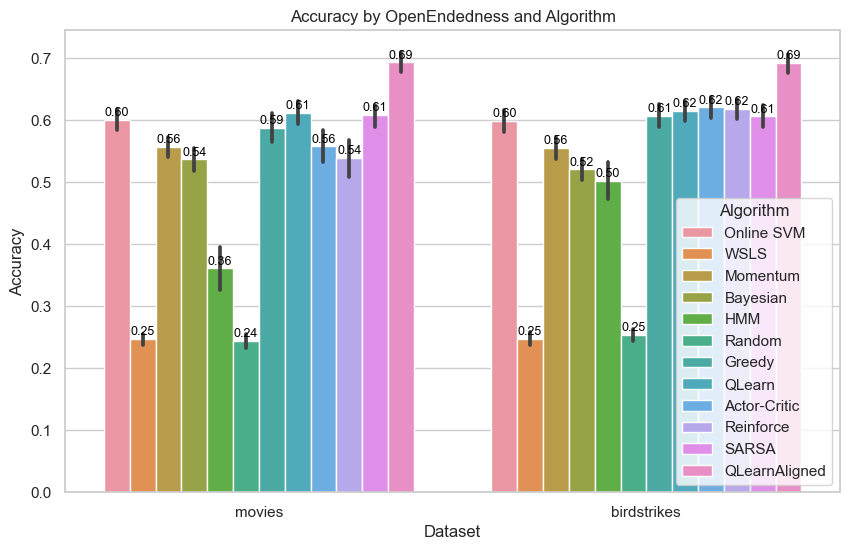

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import itertools

def plot_accuracy_openendedness(combined_results, analysis_folder):
    #plot accuracy by openendedness for each algorithm
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=combined_results, x='Dataset', y='Accuracy', hue='Algorithm')
    plt.title('Accuracy by OpenEndedness and Algorithm')
    add_values_on_bars(ax)

results = pd.read_csv('Experiments_Folder/VizRec/Analysis/GOLD-combined_results.csv')
plot_accuracy_openendedness(results, ANALYSIS_FOLDER)